In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [46]:
flowers = pd.read_csv('IrisFlowerDataset.csv')
flowers.info()
flowers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


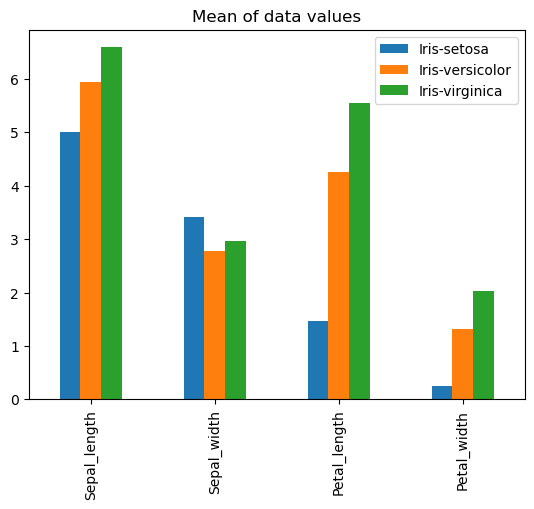

In [47]:
setosa = [flowers.loc[flowers['species'] == 'Iris-setosa', 'sepal_length'].mean(),
          flowers.loc[flowers['species'] == 'Iris-setosa', 'sepal_width'].mean(),
          flowers.loc[flowers['species'] == 'Iris-setosa', 'petal_length'].mean(),
          flowers.loc[flowers['species'] == 'Iris-setosa', 'petal_width'].mean()]

versicolor = [flowers.loc[flowers['species'] == 'Iris-versicolor', 'sepal_length'].mean(),
             flowers.loc[flowers['species'] == 'Iris-versicolor', 'sepal_width'].mean(),
             flowers.loc[flowers['species'] == 'Iris-versicolor', 'petal_length'].mean(),
             flowers.loc[flowers['species'] == 'Iris-versicolor', 'petal_width'].mean()]

virginica = [flowers.loc[flowers['species'] == 'Iris-virginica', 'sepal_length'].mean(),
             flowers.loc[flowers['species'] == 'Iris-virginica', 'sepal_width'].mean(),
             flowers.loc[flowers['species'] == 'Iris-virginica', 'petal_length'].mean(),
             flowers.loc[flowers['species'] == 'Iris-virginica', 'petal_width'].mean()]

df = pd.DataFrame({"Iris-setosa":setosa,
       "Iris-versicolor": versicolor,
       "Iris-virginica": virginica},
      index = ["Sepal_length","Sepal_width","Petal_length","Petal_width"])

df.plot(kind = 'bar')
plt.title('Mean of data values')
plt.show()

In [48]:
X = flowers[['sepal_length','sepal_width','petal_length','petal_width']]
y = flowers['species']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 1)

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

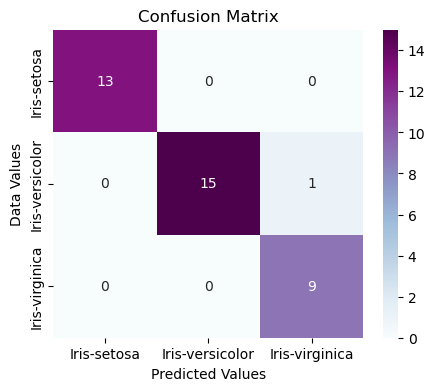

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
             index = flowers["species"].unique(),
             columns = flowers["species"].unique())
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap = 'BuPu')
plt.title('Confusion Matrix')
plt.ylabel('Data Values')
plt.xlabel('Predicted Values')
plt.show()

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of this model is: {accuracy}")

The accuracy of this model is: 0.9736842105263158


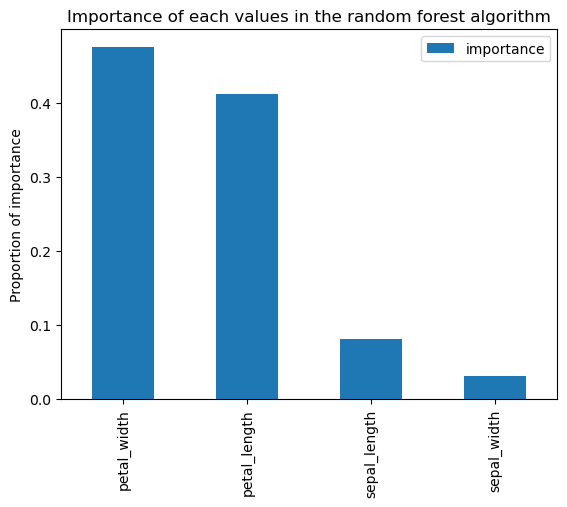

In [55]:
importance = pd.DataFrame(rf.feature_importances_,
              index = X_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)
importance.plot(kind='bar')
plt.ylabel('Proportion of importance')
plt.title('Importance of each values in the random forest algorithm')
plt.show()